In [3]:
library(tidyverse)
library(forecast)

Warning message:
"package 'forecast' was built under R version 3.3.2"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.3.2"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
Warning message:
"package 'timeDate' was built under R version 3.3.2"This is forecast 7.3 



In [4]:
data <- read.csv('usdaud_data.csv')

In [14]:
ts = ts(data)

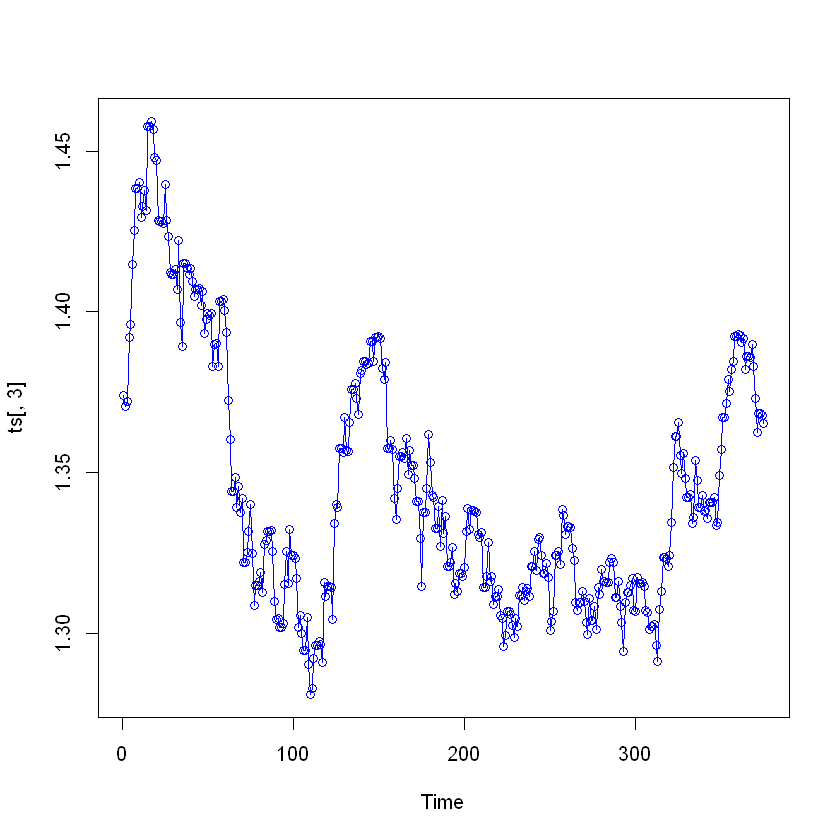

In [18]:
plot(ts[,3],type='o',col='blue') 

In [19]:
mf = meanf(ts[,3],h=12,level=c(90,95),fan=FALSE,lambda=NULL)

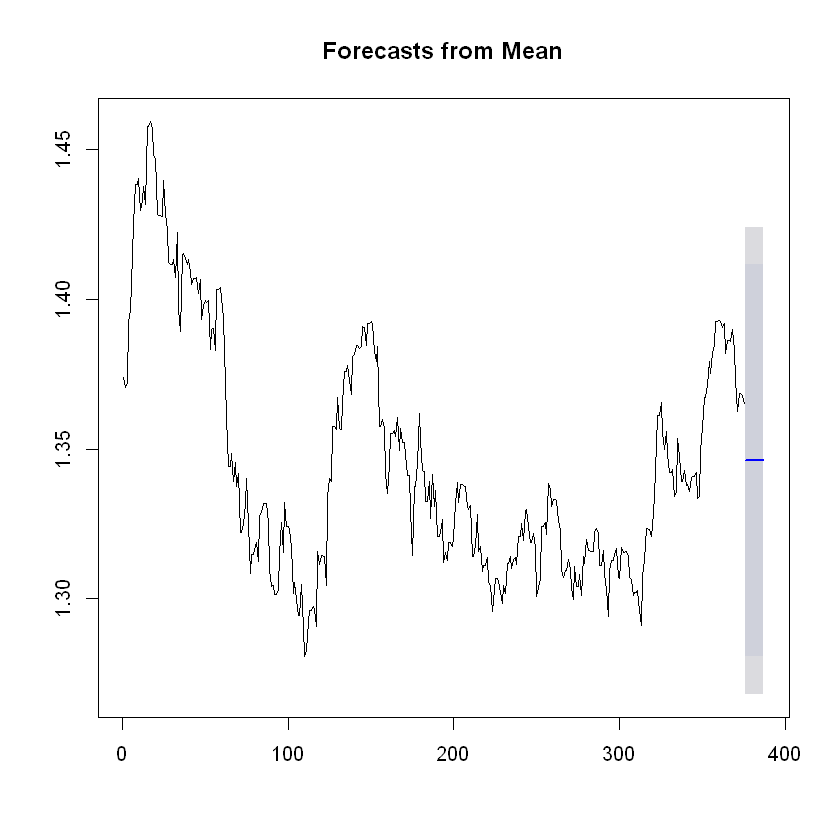

In [20]:
plot(mf)

In [21]:
diff_data = diff(ts[,3])

In [23]:
Stl = Stl(ts[,3],s.window='periodic')

ERROR: Error in eval(expr, envir, enclos): could not find function "Stl"


In [25]:
forecast(auto.arima(ts[,3]))

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
376       1.365274 1.354958 1.375590 1.349497 1.381051
377       1.365251 1.350661 1.379840 1.342938 1.387563
378       1.365228 1.347359 1.383096 1.337900 1.392555
379       1.365205 1.344572 1.385837 1.333650 1.396759
380       1.365182 1.342114 1.388250 1.329902 1.400461
381       1.365159 1.339889 1.390428 1.326512 1.403805
382       1.365135 1.337841 1.392430 1.323392 1.406878
383       1.365112 1.335933 1.394291 1.320487 1.409738
384       1.365089 1.334140 1.396038 1.317757 1.412421
385       1.365066 1.332443 1.397689 1.315174 1.414959

In [35]:
forecasts <- forecast(auto.arima(ts[,3]), h = 60) %>% as.data.frame

In [36]:
forecasts %>% head(30)

,Point Forecast,Lo 80,Hi 80,Lo 95,Hi 95
376,1.365274,1.354958,1.375590,1.349497,1.381051
377,1.365251,1.350661,1.379840,1.342938,1.387563
378,1.365228,1.347359,1.383096,1.337900,1.392555
379,1.365205,1.344572,1.385837,1.333650,1.396759
380,1.365182,1.342114,1.388250,1.329902,1.400461
381,1.365159,1.339889,1.390428,1.326512,1.403805
382,1.365135,1.337841,1.392430,1.323392,1.406878
383,1.365112,1.335933,1.394291,1.320487,1.409738
384,1.365089,1.334140,1.396038,1.317757,1.412421
385,1.365066,1.332443,1.397689,1.315174,1.414959


In [40]:
(1.451021 + 1.278188) / 2

[1] 1.364604

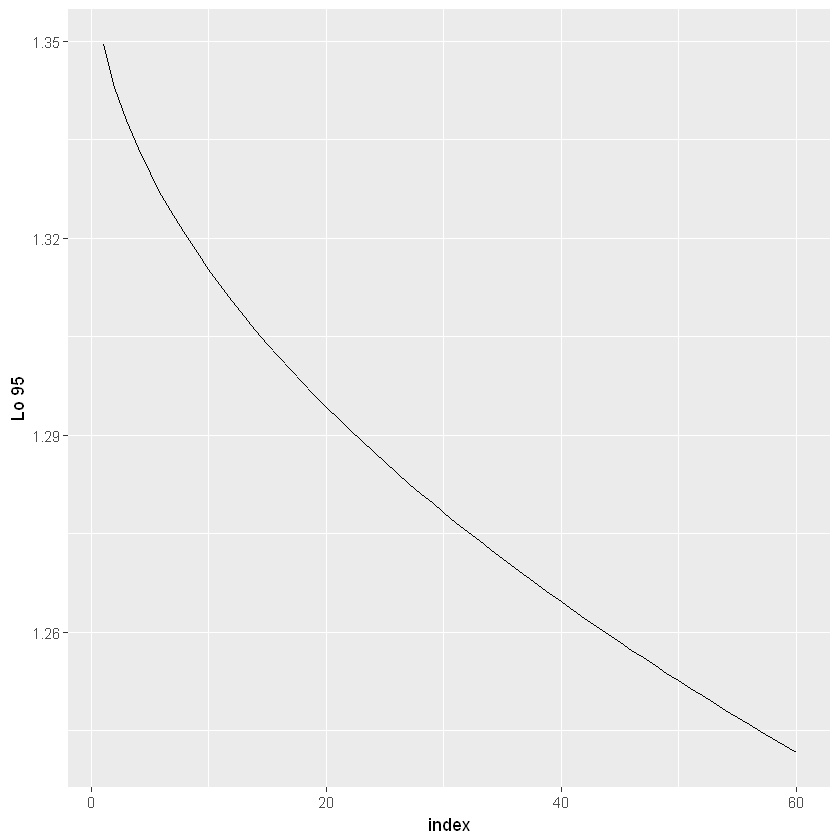

In [50]:
forecasts %>% mutate(point_forecast = `Point Forecast`, index = seq(1:60)) %>%
ggplot(aes(y = `Lo 95`, x = index)) + geom_line()

In [46]:
forecasts[1:10,]

,Point Forecast,Lo 80,Hi 80,Lo 95,Hi 95
376,1.365274,1.354958,1.375590,1.349497,1.381051
377,1.365251,1.350661,1.379840,1.342938,1.387563
378,1.365228,1.347359,1.383096,1.337900,1.392555
379,1.365205,1.344572,1.385837,1.333650,1.396759
380,1.365182,1.342114,1.388250,1.329902,1.400461
381,1.365159,1.339889,1.390428,1.326512,1.403805
382,1.365135,1.337841,1.392430,1.323392,1.406878
383,1.365112,1.335933,1.394291,1.320487,1.409738
384,1.365089,1.334140,1.396038,1.317757,1.412421
385,1.365066,1.332443,1.397689,1.315174,1.414959
